<a href="https://colab.research.google.com/github/edramos-lab/AzureCustomVision-Prediction/blob/master/Baseplate_Detection_2_2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Assembly zinc-plated components detection system based on deep neural networks: A case study

By E. R. Ramos-Acosta, E. E. Garcia-Guerrero, O. R. Lopez-Bonilla, U. J. Tamayo-Perez, E.
Garcia-Canseco, A. Navarro-Espinoza, L. Y. Ramirez-Rios, E. Inzunza-Gonzalez

##Abstract
Artificial intelligence (AI) has become the new technique for solving the most complicated challenges
related to big data, image recognition, object detection, and other classification and prediction
issues as a result of the fourth industrial revolution. This article introduces the development
and implementation of a zinc-plated component detection system within a manufacturing process
using deep learning (DL) techniques. This paper aims to train and evaluate different DL
algorithms to detect five different zinc-plated components and one assembly tray under different
ambient light conditions and different finishings. The proposed method begins with the creation
of a custom dataset with six different classes that match the assembly components. Then, the image
augmentation technique is applied to the dataset. Finally, five deep neural networks (DNNs),
such as InceptionResNetV2, Xception, InceptionV3, ResNet101V2 and ResNet152V with six artificial
neurons in the output layer to conduct the transfer learning technique are benchmarked.
The training stage is performed with an 80/20 ratio. In this study, InceptionV3 was the model
with the highest test Accuracy rated at 99.3% and Precision at 97.9%, while InceptionResNetV2
achieved 96% and a Precision rated at 87.9%. Therefore, these algorithms can be adopted as good
classifier models for zinc-plated component detection in the industrial manufacturing production
line.
Keywords: Machine Learning; Deep-Learning; Computer vision; Deep neural network; Image classification; Industry 4.0;


##Libraries installation

In [ ]:
!pip install wandb
!pip install tensorflow-addons==0.8.3
#numpy
#tensorflow==1.13.1
#keras==2.1.6
!pip install pillow
!pip install keras2onnx==1.7.0
!pip install onnxruntime
#h5py==2.10.0

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 1.8 MB 8.0 MB/s 
     |████████████████████████████████| 181 kB 73.5 MB/s 
     |████████████████████████████████| 147 kB 58.6 MB/s 
     |████████████████████████████████| 63 kB 2.1 MB/s 
  Created wheel for pathtools: filename=pathtools-0.1.2-py3-none-any.whl size=8806 sha256=fb4b65136bdf934d85bc79600a110f9b7e6625090b92340a8475641f6781d2d4
  Stored in directory: /root/.cache/pip/wheels/3e/31/09/fa59cef12cdcfecc627b3d24273699f390e71828921b2cbba2
Successfully built pathtools
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 1.0 MB 8.2 MB/s 
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |█████████████████████

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import matplotlib.text as mpl_text
import datetime as dt
  
from sklearn.metrics import classification_report,confusion_matrix, accuracy_score, f1_score, precision_score, recall_score, hamming_loss, zero_one_loss, cohen_kappa_score, auc,plot_roc_curve
from sklearn.metrics import multilabel_confusion_matrix
from sklearn.model_selection import train_test_split

from tensorflow.keras.models import Sequential, load_model
from tensorflow.keras.layers import Flatten, Conv2D, Dense, MaxPooling2D, BatchNormalization, Dropout
from tensorflow.keras.optimizers import Adam, SGD
from tensorflow import keras
import tensorflow as tf
from tensorflow.keras.applications import NASNetLarge, InceptionResNetV2, Xception, ResNet152V2, InceptionV3, DenseNet201, ResNet101V2, ResNet152, ResNet101, DenseNet169, MobileNetV2
#import tensorflow_addons as tfa

# Import W&B
import wandb
from wandb.keras import WandbCallback
import matplotlib.pyplot as plt
from collections import Counter

#1. Dataset Loading

1.1 Location

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
cd '/content/drive/MyDrive'

/content/drive/MyDrive


In [ ]:
pip install onnxruntime

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
!git clone https://github.com/onnx/tensorflow-onnx

fatal: destination path 'tensorflow-onnx' already exists and is not an empty directory.


In [ ]:
!python setup.py install

python3: can't open file 'setup.py': [Errno 2] No such file or directory


In [ ]:
!python -m tf2onnx.convert --saved-model 'model_saved_11242021-1738.h5' --output "model.onnx"

/usr/lib/python3.7/runpy.py:125: RuntimeWarning: 'tf2onnx.convert' found in sys.modules after import of package 'tf2onnx', but prior to execution of 'tf2onnx.convert'; this may result in unpredictable behaviour
  warn(RuntimeWarning(msg))
2022-07-15 22:31:40,606 - WARNING - '--tag' not specified for saved_model. Using --tag serve
Traceback (most recent call last):
  File "/usr/lib/python3.7/runpy.py", line 193, in _run_module_as_main
    "__main__", mod_spec)
  File "/usr/lib/python3.7/runpy.py", line 85, in _run_code
    exec(code, run_globals)
  File "/usr/local/lib/python3.7/dist-packages/tf2onnx/convert.py", line 696, in <module>
    main()
  File "/usr/local/lib/python3.7/dist-packages/tf2onnx/convert.py", line 238, in main
    use_graph_names=args.use_graph_names)
  File "/usr/local/lib/python3.7/dist-packages/tf2onnx/tf_loader.py", line 615, in from_saved_model
    tag, signatures, concrete_function, large_model, use_graph_names)
  File "/usr/local/lib/python3.7/dist-packages/tf

In [ ]:
#%%
TRAINING_DATA_DIR = 'sample_data/Baseplates/Training' 
#'sample_data/Baseplates/Training'#
VALIDATION_DATA_DIR='sample_data/Baseplates/Validation'
TESTING_DATA_DIR= 'sample_data/Baseplates/Test'

#1.2 Image augmentation




In [ ]:
datagen_kwargs = dict(rescale=1./255,rotation_range=10,
        shear_range=0.2,
        zoom_range=0.2,
        width_shift_range=0.2,
        brightness_range=[0,1],
        height_shift_range=0.2,
        horizontal_flip=True,validation_split=0.2)

In [ ]:
datagen_kwargs2 = dict(rescale=1./255,validation_split=0.2)

##1.2.1 Images for training:

In [ ]:
def Create_Images_for_training_NoAugmented(shape_size_W,shape_size_H):

  IMAGE_SHAPE=(shape_size_W, shape_size_H)
  train_datagen = tf.keras.preprocessing.image.ImageDataGenerator(**datagen_kwargs2)
  train_generator = train_datagen.flow_from_directory(
  TRAINING_DATA_DIR,
  batch_size=32,
  subset="training",
  seed=42,
  shuffle=True,
  target_size=IMAGE_SHAPE)
  for image_batch, label_batch in train_generator:
    break
  print(image_batch.shape, label_batch.shape)
  image_batch_train, label_batch_train = next(iter(train_generator))
  valid_datagen = tf.keras.preprocessing.image.ImageDataGenerator(**datagen_kwargs2)
  valid_generator = valid_datagen.flow_from_directory(
  TRAINING_DATA_DIR,
  subset="validation",
  shuffle=True,
  target_size=IMAGE_SHAPE
  )
  val_image_batch, val_label_batch = next(iter(valid_generator))
  print("Image batch shape: ", image_batch_train.shape)
  print("Label batch shape: ", label_batch_train.shape)
  dataset_labels = sorted(train_generator.class_indices.items(), key=lambda pair:pair[1])
  dataset_labels = np.array([key.title() for key, value in dataset_labels])
  print(dataset_labels)
  
  print(label_batch[0:5])
  print(train_generator.class_indices)
  labels = '\n'.join(sorted(train_generator.class_indices.keys()))
  with open('labels.txt', 'w') as f:
    f.write(labels)
  return train_generator,valid_generator,dataset_labels

In [ ]:
train_generator,valid_generator,dataset_labels=Create_Images_for_training_NoAugmented(299,299)

Found 1235 images belonging to 6 classes.
(32, 299, 299, 3) (32, 6)
Found 307 images belonging to 6 classes.
Image batch shape:  (32, 299, 299, 3)
Label batch shape:  (32, 6)
['Class1' 'Class2' 'Class3' 'Class4' 'Class5' 'Class6']
[[0. 0. 0. 1. 0. 0.]
 [0. 0. 1. 0. 0. 0.]
 [0. 0. 1. 0. 0. 0.]
 [1. 0. 0. 0. 0. 0.]
 [1. 0. 0. 0. 0. 0.]]
{'Class1': 0, 'Class2': 1, 'Class3': 2, 'Class4': 3, 'Class5': 4, 'Class6': 5}


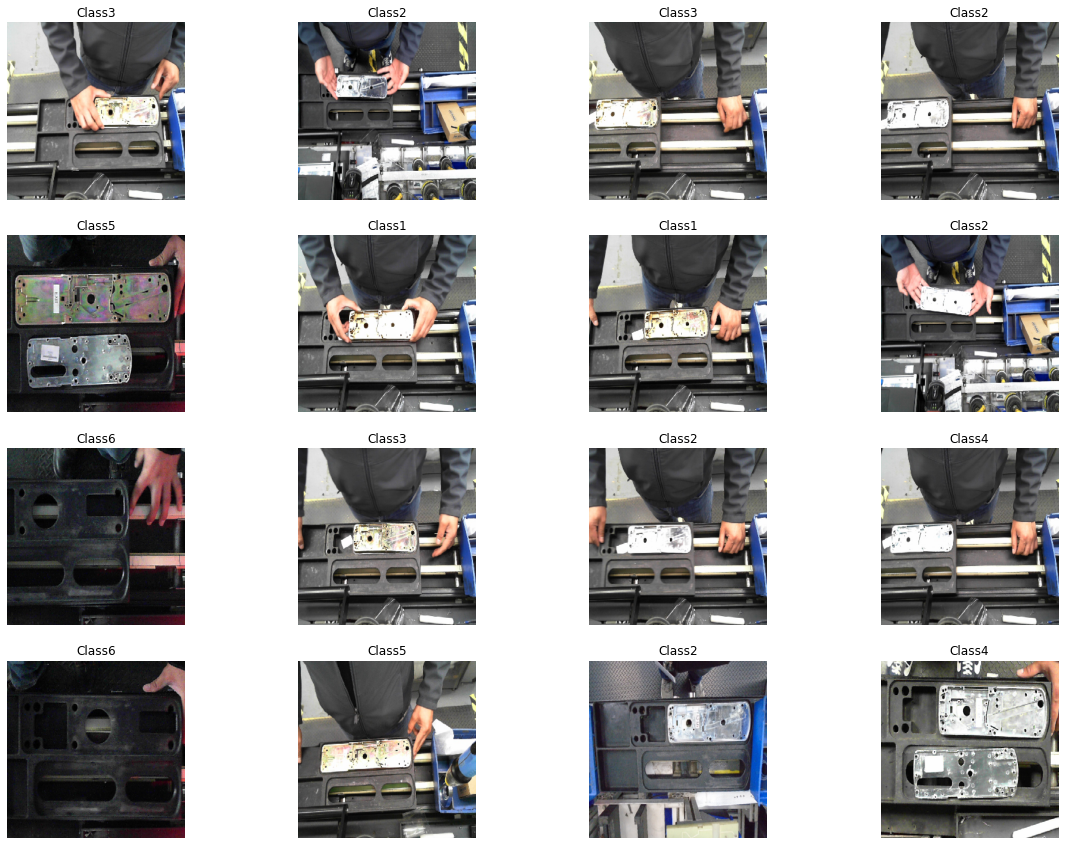

In [ ]:
class_names = dataset_labels
image_batch, label_batch = next(iter(train_generator))

plt.figure(figsize=(20, 15))
for i in range(16):
  ax = plt.subplot(4, 4, i + 1)
  plt.imshow(np.array(image_batch[i]))
  label = np.argmax(label_batch[i])
  plt.title(class_names[label])
  plt.axis("off")

In [ ]:
counter = Counter(train_generator.classes)                          
max_val = float(max(counter.values()))     
sum_val=float(sum(counter.values()))  

class_weights = {class_id :num_images/max_val for class_id, num_images in counter.items()}          
eff_balancing_data=(sum_val/(6*max_val)) *100          

Counter({1: 214, 0: 210, 2: 210, 3: 201, 4: 200, 5: 200})
214.0
1235.0

{0: 0.9813084112149533, 1: 1.0, 2: 0.9813084112149533, 3: 0.9392523364485982, 4: 0.9345794392523364, 5: 0.9345794392523364}
96.18


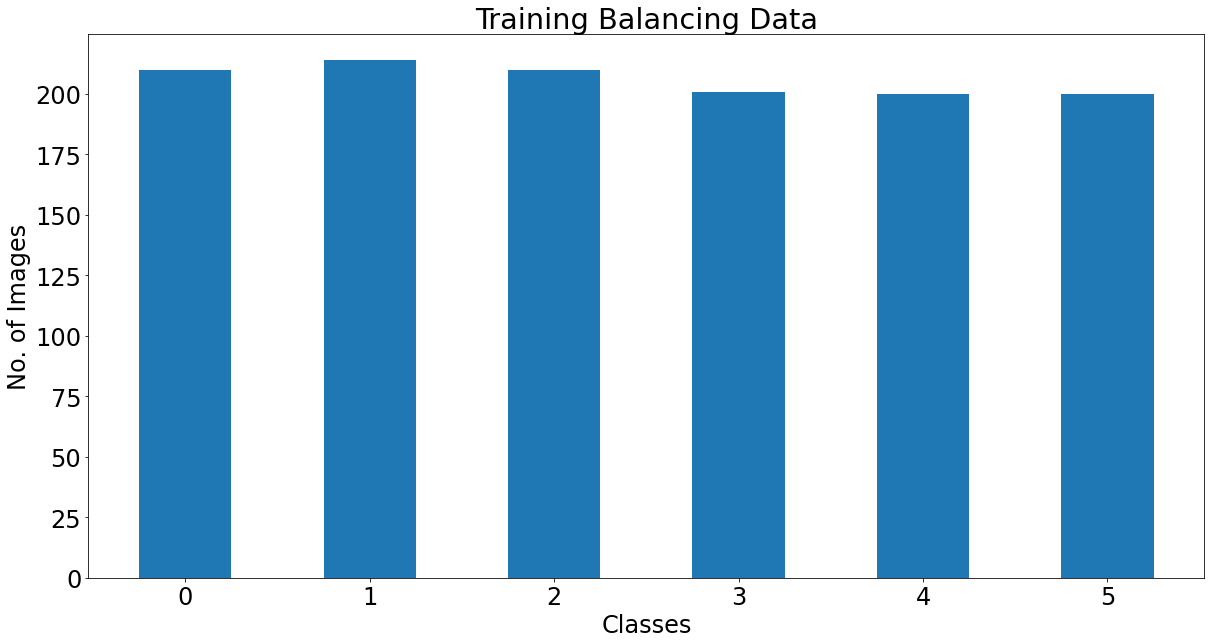

In [ ]:
#Check the training set (with batch of 10 as defined above

#imgs, labels = next(train_generator)



#Images are shown in the output
#print(train_generator.classes)
print(counter)


print(max_val)
print(sum_val)
print()
print(class_weights)
print(round(eff_balancing_data,2))

classes = list(counter.keys())
values = list(counter.values())
 
  
fig = plt.figure(figsize = (20,10))
 
# creating the bar plot
plt.bar(classes, values,
        width = 0.5)
 
plt.xlabel("Classes")
plt.ylabel("No. of Images")
plt.title("Training Balancing Data")
plt.show()

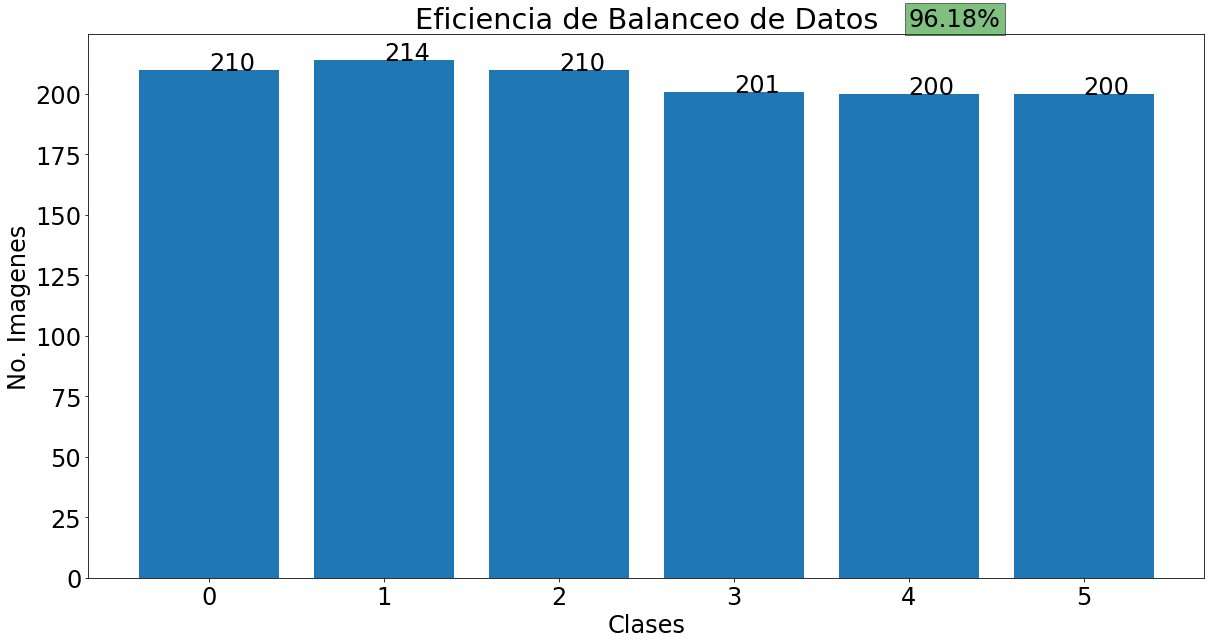

In [ ]:
def add_value_label(x_list,y_list):
    for i in range(0, len(x_list)):
        plt.text(i,y_list[i],y_list[i])
        
plt.rcParams.update({'font.size': 24})
fig = plt.figure(figsize = (20,10))
class_number=[0,1,2,3,4,5]
plt.bar(classes,values)
add_value_label(classes,values)
plt.title("Eficiencia de Balanceo de Datos")
plt.xlabel("Clases")
plt.ylabel("No. Imagenes")
plt.text(4,228,str(round(eff_balancing_data,2))+"%",bbox=dict(facecolor='green', alpha=0.5))
plt.show()

In [ ]:
def Create_Images_for_training(shape_size_W,shape_size_H):

  IMAGE_SHAPE=(shape_size_W, shape_size_H)
  train_datagen = tf.keras.preprocessing.image.ImageDataGenerator(**datagen_kwargs)
  train_generator = train_datagen.flow_from_directory(
  TRAINING_DATA_DIR,
  batch_size=32,
  subset="training",
  seed=42,
  shuffle=True,
  target_size=IMAGE_SHAPE)
  for image_batch, label_batch in train_generator:
    break
  print(image_batch.shape, label_batch.shape)
  image_batch_train, label_batch_train = next(iter(train_generator))
  valid_datagen = tf.keras.preprocessing.image.ImageDataGenerator(**datagen_kwargs)
  valid_generator = valid_datagen.flow_from_directory(
  TRAINING_DATA_DIR,
  subset="validation",
  shuffle=True,
  target_size=IMAGE_SHAPE
  )
  val_image_batch, val_label_batch = next(iter(valid_generator))
  print("Image batch shape: ", image_batch_train.shape)
  print("Label batch shape: ", label_batch_train.shape)
  dataset_labels = sorted(train_generator.class_indices.items(), key=lambda pair:pair[1])
  dataset_labels = np.array([key.title() for key, value in dataset_labels])
  print(dataset_labels)
  
  print(label_batch[0:5])
  print(train_generator.class_indices)
  labels = '\n'.join(sorted(train_generator.class_indices.keys()))
  with open('labels.txt', 'w') as f:
    f.write(labels)
  return train_generator,valid_generator,dataset_labels

In [ ]:
train_generator,valid_generator,dataset_labels=Create_Images_for_training(299,299)

Found 1235 images belonging to 6 classes.
(32, 299, 299, 3) (32, 6)
Found 307 images belonging to 6 classes.
Image batch shape:  (32, 299, 299, 3)
Label batch shape:  (32, 6)
['Class1' 'Class2' 'Class3' 'Class4' 'Class5' 'Class6']
[[0. 0. 0. 1. 0. 0.]
 [0. 0. 1. 0. 0. 0.]
 [0. 0. 1. 0. 0. 0.]
 [1. 0. 0. 0. 0. 0.]
 [1. 0. 0. 0. 0. 0.]]
{'Class1': 0, 'Class2': 1, 'Class3': 2, 'Class4': 3, 'Class5': 4, 'Class6': 5}


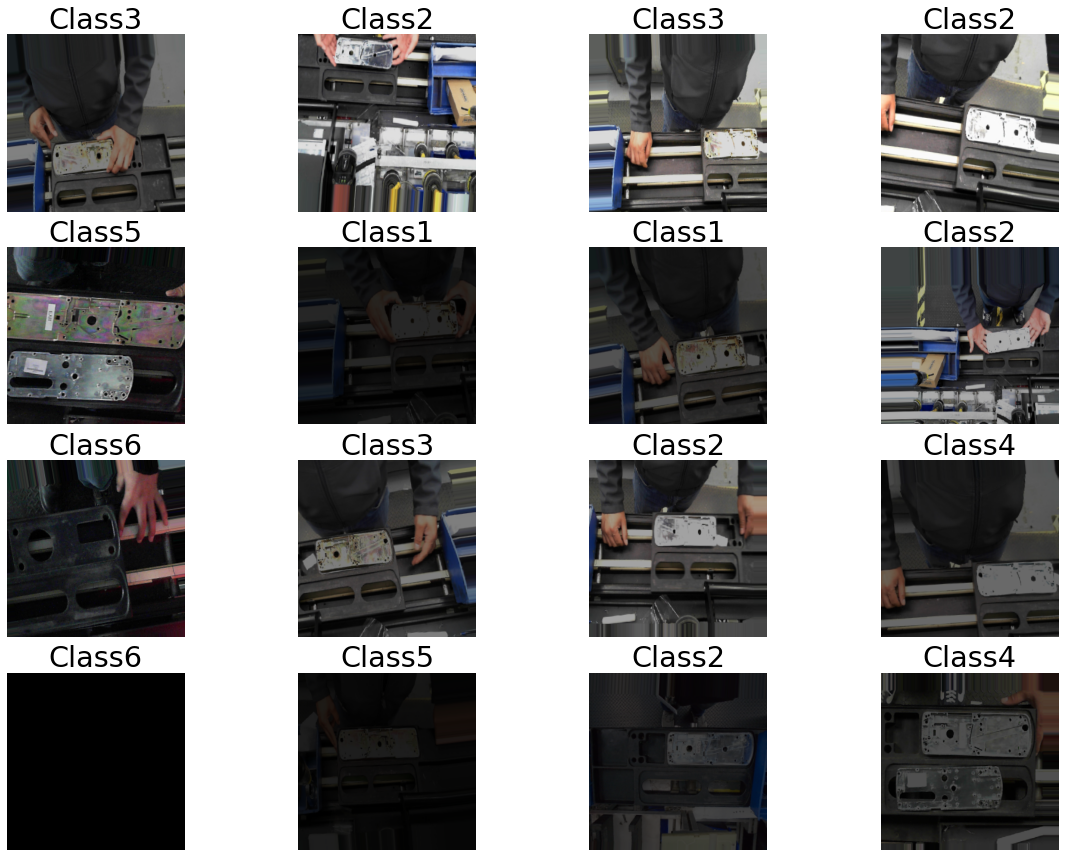

In [ ]:
class_names = dataset_labels
image_batch, label_batch = next(iter(train_generator))

plt.figure(figsize=(20, 15))
for i in range(16):
  ax = plt.subplot(4, 4, i + 1)
  plt.imshow(np.array(image_batch[i]))
  label = np.argmax(label_batch[i])
  plt.title(class_names[label])
  plt.axis("off")

#2 Metrics Definition

In [ ]:
METRICS = [
  tf.keras.metrics.TruePositives(name='tp'),
  tf.keras.metrics.FalsePositives(name='fp'),
  tf.keras.metrics.TrueNegatives(name='tn'),
  tf.keras.metrics.FalseNegatives(name='fn'), 
  tf.keras.metrics.Precision(name='precision'),
  tf.keras.metrics.Recall(name='recall'),
  tf.keras.metrics.CategoricalAccuracy(name='acc'),
  tf.keras.metrics.AUC(name='auc'),
  #tfa.metrics.CohenKappa(name='cohen_kappa',num_classes=6),
  #tfa.metrics.HammingLoss(name='hamming_loss',mode='multiclass'),
  tf.keras.metrics.SpecificityAtSensitivity(0.5),
  tf.keras.metrics.SensitivityAtSpecificity(0.5),
]

#3 ConvNet: Convolutional Neural Network Design

##3.1 Wandb Initialization

In [ ]:
wandb.init(project="Baseplates_Convnet", entity="computervision",
config = {
  "learning_rate": 0.001,
  "epochs": 30
})
config = wandb.config

NameError: ignored

##3.2 Neural Network Design

In [ ]:
steps_per_epoch = np.ceil(train_generator.samples/train_generator.batch_size)
val_steps_per_epoch = np.ceil(valid_generator.samples/valid_generator.batch_size)

model = Sequential([
       
  Conv2D(16, (3, 3), activation='relu',input_shape=(299, 299,3)),
  MaxPooling2D(),
  Conv2D(32, (3, 3), padding='same', activation='relu'),
  MaxPooling2D(),
  Conv2D(64,(3,3),padding='same',activation='relu'),
  MaxPooling2D(),
  Conv2D(128,(3,3),padding='same',activation='relu'),
  Flatten(),
  Dense(256,activation='relu'),
  Dropout(0.2),   
  Dense(6, activation='softmax')
        
 ])   

##3.3 Optimization and Compilation

In [ ]:
optimizer=keras.optimizers.Adam(lr=config.learning_rate)

model.compile(optimizer=optimizer,
              loss='categorical_crossentropy',
              metrics=METRICS)  

/usr/local/lib/python3.7/dist-packages/keras/optimizer_v2/adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


## 3.4 Training

In [ ]:
hist = model.fit(
        train_generator, 
        epochs=config.epochs,
        verbose=1,
        steps_per_epoch=steps_per_epoch,
        validation_data=valid_generator,
        validation_steps=val_steps_per_epoch,callbacks=[WandbCallback()]).history

Epoch 1/30
39/39 [==============================] - ETA: 0s - loss: 2.0050 - tp: 9.0000 - fp: 57.0000 - tn: 6118.0000 - fn: 1226.0000 - precision: 0.1364 - recall: 0.0073 - acc: 0.2089 - auc: 0.5387 - cohen_kappa: 0.0489 - hamming_loss: 0.7911 - specificity_at_sensitivity_4: 0.5006 - sensitivity_at_specificity_4: 0.5466

/usr/local/lib/python3.7/dist-packages/keras/engine/training.py:1841: UserWarning: Metric CohenKappa implements a `reset_states()` method; rename it to `reset_state()` (without the final "s"). The name `reset_states()` has been deprecated to improve API consistency.
  m.reset_state()


39/39 [==============================] - 73s 2s/step - loss: 2.0050 - tp: 9.0000 - fp: 57.0000 - tn: 6118.0000 - fn: 1226.0000 - precision: 0.1364 - recall: 0.0073 - acc: 0.2089 - auc: 0.5387 - cohen_kappa: 0.0489 - hamming_loss: 0.7911 - specificity_at_sensitivity_4: 0.5006 - sensitivity_at_specificity_4: 0.5466 - val_loss: 1.7513 - val_tp: 0.0000e+00 - val_fp: 0.0000e+00 - val_tn: 1535.0000 - val_fn: 307.0000 - val_precision: 0.0000e+00 - val_recall: 0.0000e+00 - val_acc: 0.2182 - val_auc: 0.5919 - val_cohen_kappa: 0.0592 - val_hamming_loss: 0.7818 - val_specificity_at_sensitivity_4: 0.6124 - val_sensitivity_at_specificity_4: 0.5244
Epoch 2/30
39/39 [==============================] - 71s 2s/step - loss: 1.7418 - tp: 3.0000 - fp: 8.0000 - tn: 6167.0000 - fn: 1232.0000 - precision: 0.2727 - recall: 0.0024 - acc: 0.2510 - auc: 0.5937 - cohen_kappa: 0.1008 - hamming_loss: 0.7490 - specificity_at_sensitivity_4: 0.5887 - sensitivity_at_specificity_4: 0.5255 - val_loss: 1.7304 - val_tp: 6.0

In [ ]:
  model.save('Model_baseplates'+'_'+'ConvNet'+str(dt.datetime.now())+'.h5')

#5 Results

##5.1 Test images preparation

In [ ]:
def testGen(width,height):
  val_datagen = tf.keras.preprocessing.image.ImageDataGenerator(rescale=1.0/255.0)
  validation_data_dir=VALIDATION_DATA_DIR
  validationTest_generator = val_datagen.flow_from_directory(
        validation_data_dir,
        target_size=(width,height),
        batch_size=32,
        class_mode='categorical',
        shuffle=False)
  return validationTest_generator

##5.2 Report preparation

In [ ]:
def Classification_report(trained_model, W, H):  
  
  #Confution Matrix and Classification Report
  Images4ValidationGenerator=testGen(W,H)
  class_labels = Images4ValidationGenerator.class_indices
  class_labels = {v: k for k, v in class_labels.items()}
  classes = list(class_labels.values())
  y_true = Images4ValidationGenerator.classes
  Y_pred = trained_model.predict(Images4ValidationGenerator)
  y_pred = np.argmax(Y_pred, axis=1)

  conf_mat = confusion_matrix(Images4ValidationGenerator.classes, y_pred)
  conf_mat_normalized = conf_mat.astype('float') / conf_mat.sum(axis=1)[:, np.newaxis]
  plt.figure(figsize = (10,10))
  sns.heatmap(conf_mat, annot=True,fmt='d',cmap="Blues")
  plt.ylabel('True label')
  plt.xlabel('Predicted label')

  acc = accuracy_score(y_true, y_pred)
  f1 = f1_score(y_true, y_pred, average='macro')  
  prec = precision_score(y_true, y_pred, average='macro')
  rec = recall_score(y_true, y_pred, average='macro')
  hamming = hamming_loss(y_true, y_pred)
  zero = zero_one_loss(y_true, y_pred)
  cohen = cohen_kappa_score(y_true, y_pred)
  
  
  TruePositive = np.diag(conf_mat)
  FalsePositive = []
  FalseNegative = []
  TrueNegative = []

  for i in range(6):
      FalsePositive.append(sum(conf_mat[:,i]) - conf_mat[i,i])  
      FalseNegative.append(sum(conf_mat[i,:]) - conf_mat[i,i])
      temp = np.delete(conf_mat, i, 0)   # delete ith row
      temp = np.delete(temp, i, 1)  # delete ith column
      TrueNegative.append(sum(sum(temp)))

  TP = sum(TruePositive)
  FP = sum(FalsePositive)
  FN = sum(FalseNegative)
  TN = sum(TrueNegative)

  print(y_true)
  print(y_pred)#
  wandb.sklearn.plot_confusion_matrix(y_true,y_pred, classes)
  #wandb.log({"roc" : wandb.plot.roc_curve( y_true, Y_pred,labels=class_labels)})

  wandb.log({"roc" : wandb.plot.roc_curve(y_true, Y_pred,labels=class_labels),
              "conf_mat" : wandb.plot.confusion_matrix(probs=None,
                        y_true=Images4ValidationGenerator.classes, preds=y_pred,
                        class_names=classes),
              "accuracy_score": acc,
             "f1_score": f1,
             "precision_score": prec,
             "recall_score": rec,
             "hamming_loss": hamming,
             "zero_one_loss": zero,
             "cohen_kappa": cohen,
             "TruePositive": TruePositive,
              "*TP": TP,
              "FalsePositive": FalsePositive,
              "*FP": FP,
              "TrueNegative": TrueNegative,
              "*TN" : TN,
              "FalseNegative": FalseNegative,
              "*FN": FN})

  print(acc)
  print(f1)
  print(prec)
  print(rec)
  print(hamming)
  print(zero)
  print(cohen)
  print(TruePositive)
  print(TP)
  print(FalsePositive)
  print(FP)
  print(TrueNegative)
  print(TN)
  print(FalseNegative)
  print(FN)

In [ ]:
Classification_report(model, 299, 299)

NameError: ignored

In [ ]:
wandb.finish()

#6 Transfer learning

##6.1 Transfer Learning Models definition

In [ ]:
def train_model(TL_Model,w,h):
  wandb.init(project=TL_Model.__name__, entity="computervision",
  config = {
    "learning_rate": 0.001,
    "epochs": 30,
  })
  config = wandb.config

  train_generator,valid_generator,dataset_labels=Create_Images_for_training(w,h)
  
  pre_trained_model=TL_Model(input_shape=(w,h,3),
                              include_top=False,
                              weights='imagenet')
  for layer in pre_trained_model.layers:
    layer.trainable = False
 
  model = tf.keras.Sequential([pre_trained_model,
                                 tf.keras.layers.GlobalAveragePooling2D(),
                                 tf.keras.layers.Dropout(0.2),
                                 tf.keras.layers.Dense(6, activation="softmax")                                     
                                ])


  optimizer=keras.optimizers.Adam(learning_rate=config.learning_rate)

  model.compile(optimizer=optimizer,
              loss='categorical_crossentropy',
              metrics=METRICS)
  
  steps_per_epoch = np.ceil(train_generator.samples/train_generator.batch_size)
  val_steps_per_epoch = np.ceil(valid_generator.samples/valid_generator.batch_size)

  history = model.fit(train_generator, 
         epochs=config.epochs,
         verbose=1,
         steps_per_epoch=steps_per_epoch,
         validation_data=valid_generator,
         validation_steps=val_steps_per_epoch,callbacks=[WandbCallback()])
  model.save('Master_Baseplates'+'_'+TL_Model.__name__+str(dt.datetime.now())+'.h5')
  wandb.save('Master_Baseplates' + '_'+ TL_Model.__name__+str(dt.datetime.now())+'.h5')

  #wandb.finish()
  return history,model

#7 Training Stage

##6.1.0 MobileNetV2

acc,▁█
auc,▁█
cohen_kappa,▁█
epoch,▁█
fn,█▁
fp,█▁
hamming_loss,█▁
loss,█▁
precision,▁█
recall,▁█
sensitivity_at_specificity_4,▁█


Found 1235 images belonging to 6 classes.
(32, 224, 224, 3) (32, 6)
Found 307 images belonging to 6 classes.
Image batch shape:  (32, 224, 224, 3)
Label batch shape:  (32, 6)
['Class1' 'Class2' 'Class3' 'Class4' 'Class5' 'Class6']
[[0. 0. 0. 1. 0. 0.]
 [0. 0. 1. 0. 0. 0.]
 [0. 0. 1. 0. 0. 0.]
 [1. 0. 0. 0. 0. 0.]
 [1. 0. 0. 0. 0. 0.]]
{'Class1': 0, 'Class2': 1, 'Class3': 2, 'Class4': 3, 'Class5': 4, 'Class6': 5}
Epoch 1/2
39/39 [==============================] - ETA: 0s - loss: 1.6229 - tp: 271.0000 - fp: 222.0000 - tn: 7488.0000 - fn: 1271.0000 - precision: 0.5497 - recall: 0.1757 - acc: 0.3898 - auc: 0.7496 - cohen_kappa: 0.2677 - hamming_loss: 0.6102 - specificity_at_sensitivity_4: 0.8188 - sensitivity_at_specificity_4: 0.8132

/usr/local/lib/python3.7/dist-packages/keras/engine/training.py:1841: UserWarning: Metric CohenKappa implements a `reset_states()` method; rename it to `reset_state()` (without the final "s"). The name `reset_states()` has been deprecated to improve API consistency.
  m.reset_state()
/usr/local/lib/python3.7/dist-packages/keras/engine/functional.py:1410: CustomMaskWarning: Custom mask layers require a config and must override get_config. When loading, the custom mask layer must be passed to the custom_objects argument.
  layer_config = serialize_layer_fn(layer)


39/39 [==============================] - 62s 1s/step - loss: 1.6229 - tp: 271.0000 - fp: 222.0000 - tn: 7488.0000 - fn: 1271.0000 - precision: 0.5497 - recall: 0.1757 - acc: 0.3898 - auc: 0.7496 - cohen_kappa: 0.2677 - hamming_loss: 0.6102 - specificity_at_sensitivity_4: 0.8188 - sensitivity_at_specificity_4: 0.8132 - val_loss: 1.2602 - val_tp: 62.0000 - val_fp: 18.0000 - val_tn: 1517.0000 - val_fn: 245.0000 - val_precision: 0.7750 - val_recall: 0.2020 - val_acc: 0.4463 - val_auc: 0.8303 - val_cohen_kappa: 0.3365 - val_hamming_loss: 0.5537 - val_specificity_at_sensitivity_4: 0.8736 - val_sensitivity_at_specificity_4: 0.9218
Epoch 2/2
39/39 [==============================] - 54s 1s/step - loss: 1.2188 - tp: 382.0000 - fp: 141.0000 - tn: 6034.0000 - fn: 853.0000 - precision: 0.7304 - recall: 0.3093 - acc: 0.5150 - auc: 0.8404 - cohen_kappa: 0.4181 - hamming_loss: 0.4850 - specificity_at_sensitivity_4: 0.9126 - sensitivity_at_specificity_4: 0.9223 - val_loss: 1.0600 - val_tp: 107.0000 - v

FN,▁
FP,▁
TN,▁
TP,▁
acc,▁█
accuracy_score,▁
auc,▁█
cohen_kappa,▁▃█
epoch,▁█
f1_score,▁
fn,█▁


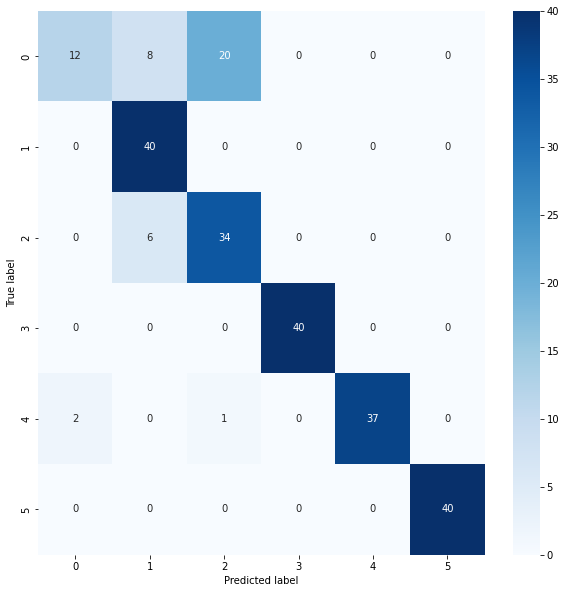

In [ ]:
model_history,model=train_model(MobileNetV2,224,224)

##6.1.1 NASNetLarge

In [ ]:
model_history,model=train_model(NASNetLarge,331,331)

NameError: ignored

##6.1.2 InceptionResNetV2

In [ ]:
model_history,model=train_model(InceptionResNetV2,299,299)

acc,▁▄▅▆▆▆▆▇▇▇▇▇▇▇▇▇▇▇█▇▇█▇▇████████████████
auc,▁▆▆▇▇▇▇▇████████████████████████████████
cohen_kappa,▁▄▅▆▆▆▆▇▇▇▇▇▇▇▇▇▇▇█▇▇█▇▇████████████████
epoch,▁▁▁▁▂▂▂▂▂▃▃▃▃▃▃▄▄▄▄▄▅▅▅▅▅▅▆▆▆▆▆▆▇▇▇▇▇███
fn,█▅▄▃▃▃▃▂▂▂▂▂▂▂▂▂▂▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁
fp,▁▄▇▇█▆▇▇▃▅▇▇▅▅▄▅▆▅▃▅▅▄▅▆▅▄▄▅▄▅▄▅▄▄▄▃▅▅▅▄
hamming_loss,█▅▄▃▃▃▃▂▂▂▂▂▂▂▂▂▂▂▁▂▂▁▂▂▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁
loss,█▅▄▄▃▃▃▃▂▂▂▂▂▂▂▂▂▂▁▂▁▁▂▂▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁
precision,▁▃▁▂▂▅▃▄█▆▄▅▆▆▇▆▅▆█▇▇▇▆▆▇██▆▇▇▇▇▇▇▇█▇▇▇█
recall,▁▄▅▆▆▆▆▇▇▇▇▇▇▇▇▇▇███████████████████████
sensitivity_at_specificity,▁███████████████████████████████████████


Found 1235 images belonging to 6 classes.
(32, 299, 299, 3) (32, 6)
Found 307 images belonging to 6 classes.
Image batch shape:  (32, 299, 299, 3)
Label batch shape:  (32, 6)
['Class1' 'Class2' 'Class3' 'Class4' 'Class5' 'Class6']
[[0. 0. 0. 1. 0. 0.]
 [0. 0. 1. 0. 0. 0.]
 [0. 0. 1. 0. 0. 0.]
 [1. 0. 0. 0. 0. 0.]
 [1. 0. 0. 0. 0. 0.]]
{'Class1': 0, 'Class2': 1, 'Class3': 2, 'Class4': 3, 'Class5': 4, 'Class6': 5}
219070464/219055592 [==============================] - 2s 0us/step
Epoch 1/50
39/39 [==============================] - ETA: 0s - loss: 1.6404 - tp: 336.0000 - fp: 83.0000 - tn: 7627.0000 - fn: 1206.0000 - precision: 0.8019 - recall: 0.2179 - acc: 0.4267 - auc: 0.7699 - cohen_kappa: 0.3119 - hamming_loss: 0.5733 - MatthewsCorrelationCoefficient: 0.2886 - f1_score: 0.4264 - specificity_at_sensitivity: 0.8419 - sensitivity_at_specificity: 0.8191

/usr/local/lib/python3.7/dist-packages/keras/engine/training.py:1841: UserWarning: Metric CohenKappa implements a `reset_states()` method; rename it to `reset_state()` (without the final "s"). The name `reset_states()` has been deprecated to improve API consistency.
  m.reset_state()
/usr/local/lib/python3.7/dist-packages/keras/engine/training.py:1841: UserWarning: Metric MatthewsCorrelationCoefficient implements a `reset_states()` method; rename it to `reset_state()` (without the final "s"). The name `reset_states()` has been deprecated to improve API consistency.
  m.reset_state()
/usr/local/lib/python3.7/dist-packages/keras/engine/training.py:1841: UserWarning: Metric F1Score implements a `reset_states()` method; rename it to `reset_state()` (without the final "s"). The name `reset_states()` has been deprecated to improve API consistency.
  m.reset_state()


39/39 [==============================] - 108s 2s/step - loss: 1.6404 - tp: 336.0000 - fp: 83.0000 - tn: 7627.0000 - fn: 1206.0000 - precision: 0.8019 - recall: 0.2179 - acc: 0.4267 - auc: 0.7699 - cohen_kappa: 0.3119 - hamming_loss: 0.5733 - MatthewsCorrelationCoefficient: 0.2886 - f1_score: 0.4264 - specificity_at_sensitivity: 0.8419 - sensitivity_at_specificity: 0.8191 - val_loss: 1.3205 - val_tp: 59.0000 - val_fp: 2.0000 - val_tn: 1533.0000 - val_fn: 248.0000 - val_precision: 0.9672 - val_recall: 0.1922 - val_acc: 0.5277 - val_auc: 0.8051 - val_cohen_kappa: 0.4322 - val_hamming_loss: 0.4723 - val_MatthewsCorrelationCoefficient: 0.2887 - val_f1_score: 0.4519 - val_specificity_at_sensitivity: 0.9349 - val_sensitivity_at_specificity: 0.8111
Epoch 2/50
39/39 [==============================] - 81s 2s/step - loss: 1.2219 - tp: 274.0000 - fp: 51.0000 - tn: 6124.0000 - fn: 961.0000 - precision: 0.8431 - recall: 0.2219 - acc: 0.5247 - auc: 0.8485 - cohen_kappa: 0.4297 - hamming_loss: 0.4753 

##6.1.3 Xception

In [ ]:
model_history,model=train_model(Xception,299,299)

<IPython.core.display.Javascript object>

wandb: You can find your API key in your browser here: https://wandb.ai/authorize


wandb: Paste an API key from your profile and hit enter, or press ctrl+c to quit: ··········


wandb: Appending key for api.wandb.ai to your netrc file: /root/.netrc


Found 1235 images belonging to 6 classes.
(32, 299, 299, 3) (32, 6)
Found 307 images belonging to 6 classes.
Image batch shape:  (32, 299, 299, 3)
Label batch shape:  (32, 6)
['Class1' 'Class2' 'Class3' 'Class4' 'Class5' 'Class6']
[[0. 0. 0. 1. 0. 0.]
 [0. 0. 1. 0. 0. 0.]
 [0. 0. 1. 0. 0. 0.]
 [1. 0. 0. 0. 0. 0.]
 [1. 0. 0. 0. 0. 0.]]
{'Class1': 0, 'Class2': 1, 'Class3': 2, 'Class4': 3, 'Class5': 4, 'Class6': 5}
83697664/83683744 [==============================] - 1s 0us/step


wandb: WARNING The save_model argument by default saves the model in the HDF5 format that cannot save custom objects like subclassed models and custom layers. This behavior will be deprecated in a future release in favor of the SavedModel format. Meanwhile, the HDF5 model is saved as W&B files and the SavedModel as W&B Artifacts.


Epoch 1/30
39/39 [==============================] - ETA: 0s - loss: 1.4445 - tp: 114.0000 - fp: 1.0000 - tn: 6174.0000 - fn: 1121.0000 - precision: 0.9913 - recall: 0.0923 - acc: 0.4356 - auc: 0.7930 - cohen_kappa: 0.3230 - hamming_loss: 0.5644 - specificity_at_sensitivity: 0.8687 - sensitivity_at_specificity: 0.8494 

/usr/local/lib/python3.7/dist-packages/keras/engine/training.py:2034: UserWarning: Metric CohenKappa implements a `reset_states()` method; rename it to `reset_state()` (without the final "s"). The name `reset_states()` has been deprecated to improve API consistency.
  m.reset_state()


39/39 [==============================] - 896s 23s/step - loss: 1.4445 - tp: 114.0000 - fp: 1.0000 - tn: 6174.0000 - fn: 1121.0000 - precision: 0.9913 - recall: 0.0923 - acc: 0.4356 - auc: 0.7930 - cohen_kappa: 0.3230 - hamming_loss: 0.5644 - specificity_at_sensitivity: 0.8687 - sensitivity_at_specificity: 0.8494 - val_loss: 1.1843 - val_tp: 52.0000 - val_fp: 5.0000 - val_tn: 1530.0000 - val_fn: 255.0000 - val_precision: 0.9123 - val_recall: 0.1694 - val_acc: 0.5831 - val_auc: 0.8977 - val_cohen_kappa: 0.4990 - val_hamming_loss: 0.4169 - val_specificity_at_sensitivity: 0.9466 - val_sensitivity_at_specificity: 0.9739 - _timestamp: 1653383701.0000 - _runtime: 912.0000
Epoch 2/30
39/39 [==============================] - 59s 2s/step - loss: 1.0568 - tp: 293.0000 - fp: 10.0000 - tn: 6165.0000 - fn: 942.0000 - precision: 0.9670 - recall: 0.2372 - acc: 0.6583 - auc: 0.9194 - cohen_kappa: 0.5899 - hamming_loss: 0.3417 - specificity_at_sensitivity: 0.9743 - sensitivity_at_specificity: 0.9870 - v

acc,▁▄▅▆▇▇▇▇▇▇▇▇▇█▇▇██████████████
auc,▁▅▆▇▇▇▇███████████████████████
cohen_kappa,▁▄▅▆▇▇▇▇▇▇▇▇▇█▇▇██████████████
epoch,▁▁▁▂▂▂▂▃▃▃▃▄▄▄▄▅▅▅▅▆▆▆▆▇▇▇▇███
fn,█▇▅▄▄▃▃▃▂▂▂▂▂▂▂▂▂▁▁▁▁▁▁▁▁▁▁▁▁▁
fp,▁▂▅▅▆▆▇▆▆██▇▇▇▇▇▇▇▆▇▇██▇▆▇▇▇▆▇
hamming_loss,█▅▄▃▂▂▂▂▂▂▂▂▂▁▂▂▁▁▁▁▁▁▁▁▁▁▁▁▁▁
loss,█▆▄▄▃▃▃▃▂▂▂▂▂▂▂▂▂▁▂▁▁▁▁▁▁▁▁▁▁▁
precision,█▅▁▃▂▃▁▃▂▁▁▂▂▃▂▃▃▃▄▃▂▂▂▃▃▂▃▃▄▃
recall,▁▂▄▅▅▆▆▆▇▇▇▇▇▇▇▇▇█████████████
sensitivity_at_specificity,▁▇████████████████████████████


##6.1.4 ResNet152V2

In [ ]:
model_history,model=train_model(ResNet152V2,224,224)

##6.1.5 InceptionV3

*FN,▁
*FP,▁
*TN,▁
*TP,▁
acc,▁
accuracy_score,▁
auc,▁
cohen_kappa,▁
epoch,▁
f1_score,▁
fn,▁


Found 1235 images belonging to 6 classes.
(32, 299, 299, 3) (32, 6)
Found 307 images belonging to 6 classes.
Image batch shape:  (32, 299, 299, 3)
Label batch shape:  (32, 6)
['Class1' 'Class2' 'Class3' 'Class4' 'Class5' 'Class6']
[[0. 0. 0. 1. 0. 0.]
 [0. 0. 1. 0. 0. 0.]
 [0. 0. 1. 0. 0. 0.]
 [1. 0. 0. 0. 0. 0.]
 [1. 0. 0. 0. 0. 0.]]
{'Class1': 0, 'Class2': 1, 'Class3': 2, 'Class4': 3, 'Class5': 4, 'Class6': 5}
Epoch 1/30
39/39 [==============================] - 68s 2s/step - loss: 1.4984 - tp: 224.0000 - fp: 77.0000 - tn: 7633.0000 - fn: 1318.0000 - precision: 0.7442 - recall: 0.1453 - acc: 0.4462 - auc: 0.7768 - specificity_at_sensitivity: 0.8528 - sensitivity_at_specificity: 0.8418 - val_loss: 1.1161 - val_tp: 74.0000 - val_fp: 6.0000 - val_tn: 1529.0000 - val_fn: 233.0000 - val_precision: 0.9250 - val_recall: 0.2410 - val_acc: 0.5440 - val_auc: 0.8844 - val_specificity_at_sensitivity: 0.9362 - val_sensitivity_at_specificity: 0.9577 - _timestamp: 1657987674.0000 - _runtime: 83.0000

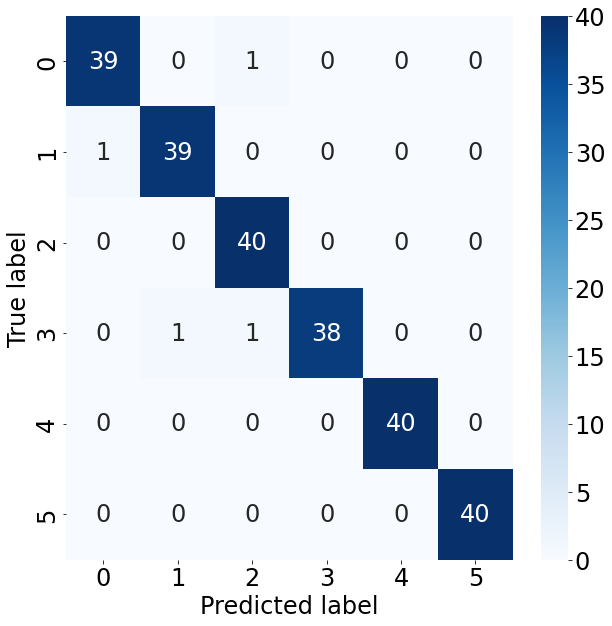

In [ ]:
model_history,model=train_model(InceptionV3,299,299)
Classification_report(model,299,299)

In [ ]:
model_history,model=train_model(InceptionV4,299,299)
Classification_report(model,299,299)

NameError: ignored

In [ ]:
from sklearn import metrics
fpr=0.004
tpr=0.979
metrics.auc(fpr, tpr)

TypeError: ignored

##6.1.6 DenseNet201

acc,▁▃▅▅▆▆▆▆▇▇▇▇▇▇▇▇▇▇▇▇▇██▇▇▇▇█▇█████▇█▇███
auc,▁▅▆▆▇▇▇▇▇▇██████████████████████████████
cohen_kappa,▁▃▅▅▆▆▆▆▇▇▇▇▇▇▇▇▇▇▇▇▇██▇▇▇▇█▇█████▇█▇███
epoch,▁▁▁▁▂▂▂▂▂▃▃▃▃▃▃▄▄▄▄▄▅▅▅▅▅▅▆▆▆▆▆▆▇▇▇▇▇███
fn,█▇▆▅▄▄▃▃▃▃▃▂▂▂▂▂▂▂▂▂▂▂▂▂▁▂▂▁▁▁▁▂▁▁▂▁▁▁▁▁
fp,▆▂▃▂▄▃▄▅▄▄▂▂▅▃▇▆▆▇▆▇▄▅▁▄▅▇▆▅█▄▃▆▄▇▄▅█▆▇▅
hamming_loss,█▆▄▄▃▃▃▃▂▂▂▂▂▂▂▂▂▂▂▂▂▁▁▂▂▂▂▁▂▁▁▁▁▁▂▁▂▁▁▁
loss,█▆▅▄▃▃▃▃▂▂▂▂▂▂▂▂▂▂▂▂▂▂▂▂▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁
precision,▁▆▆▇▇▇▇▇▇▇██▇█▇▇▇▇█▇█████▇██▇████▇██▇███
recall,▁▂▃▄▅▅▆▆▆▆▆▇▇▇▇▇▇▇▇▇▇▇▇▇█▇▇████▇██▇█████
sensitivity_at_specificity,▁▆▇▇████████████████████████████████████


Found 1235 images belonging to 6 classes.
(32, 224, 224, 3) (32, 6)
Found 307 images belonging to 6 classes.
Image batch shape:  (32, 224, 224, 3)
Label batch shape:  (32, 6)
['Class1' 'Class2' 'Class3' 'Class4' 'Class5' 'Class6']
[[0. 0. 0. 1. 0. 0.]
 [0. 0. 1. 0. 0. 0.]
 [0. 0. 1. 0. 0. 0.]
 [1. 0. 0. 0. 0. 0.]
 [1. 0. 0. 0. 0. 0.]]
{'Class1': 0, 'Class2': 1, 'Class3': 2, 'Class4': 3, 'Class5': 4, 'Class6': 5}
Epoch 1/20
39/39 [==============================] - ETA: 0s - loss: 1.5858 - tp: 342.0000 - fp: 89.0000 - tn: 7621.0000 - fn: 1200.0000 - precision: 0.7935 - recall: 0.2218 - acc: 0.4403 - auc: 0.7773 - cohen_kappa: 0.3281 - hamming_loss: 0.5597 - specificity_at_sensitivity: 0.8559 - sensitivity_at_specificity: 0.8431

/usr/local/lib/python3.7/dist-packages/keras/engine/training.py:1841: UserWarning: Metric CohenKappa implements a `reset_states()` method; rename it to `reset_state()` (without the final "s"). The name `reset_states()` has been deprecated to improve API consistency.
  m.reset_state()


39/39 [==============================] - 73s 1s/step - loss: 1.5858 - tp: 342.0000 - fp: 89.0000 - tn: 7621.0000 - fn: 1200.0000 - precision: 0.7935 - recall: 0.2218 - acc: 0.4403 - auc: 0.7773 - cohen_kappa: 0.3281 - hamming_loss: 0.5597 - specificity_at_sensitivity: 0.8559 - sensitivity_at_specificity: 0.8431 - val_loss: 1.3242 - val_tp: 39.0000 - val_fp: 6.0000 - val_tn: 1529.0000 - val_fn: 268.0000 - val_precision: 0.8667 - val_recall: 0.1270 - val_acc: 0.4853 - val_auc: 0.8247 - val_cohen_kappa: 0.3820 - val_hamming_loss: 0.5147 - val_specificity_at_sensitivity: 0.8840 - val_sensitivity_at_specificity: 0.9088
Epoch 2/20
39/39 [==============================] - 53s 1s/step - loss: 1.2382 - tp: 299.0000 - fp: 66.0000 - tn: 6109.0000 - fn: 936.0000 - precision: 0.8192 - recall: 0.2421 - acc: 0.5198 - auc: 0.8407 - cohen_kappa: 0.4240 - hamming_loss: 0.4802 - specificity_at_sensitivity: 0.9160 - sensitivity_at_specificity: 0.9215 - val_loss: 1.1796 - val_tp: 95.0000 - val_fp: 18.0000 

acc,▁▃▃▅▅▇▆▆▇▇▇▇▇█▇█████
auc,▁▃▅▆▆▇▇▇▇█▇█████████
cohen_kappa,▁▃▃▅▅▇▆▆▇▇▇▇▇█▇█████
epoch,▁▁▂▂▂▃▃▄▄▄▅▅▅▆▆▇▇▇██
fn,█▆▅▄▄▃▃▃▂▂▂▂▂▁▂▂▁▁▁▁
fp,▆▁▄▄▃▂▄▃▅▄▃▁▇▆█▂▃▅▄▄
hamming_loss,█▆▆▄▄▂▃▃▂▂▂▂▂▁▂▁▁▁▁▁
loss,█▆▅▄▃▃▃▂▂▂▂▂▂▁▂▂▁▁▁▁
precision,▁▂▃▅▆▇▆▇▇▇▇█▆▇▆█████
recall,▁▁▃▄▄▅▅▆▆▇▇▇▇▇▇▇████
sensitivity_at_specificity,▁▄▇▇████████████████


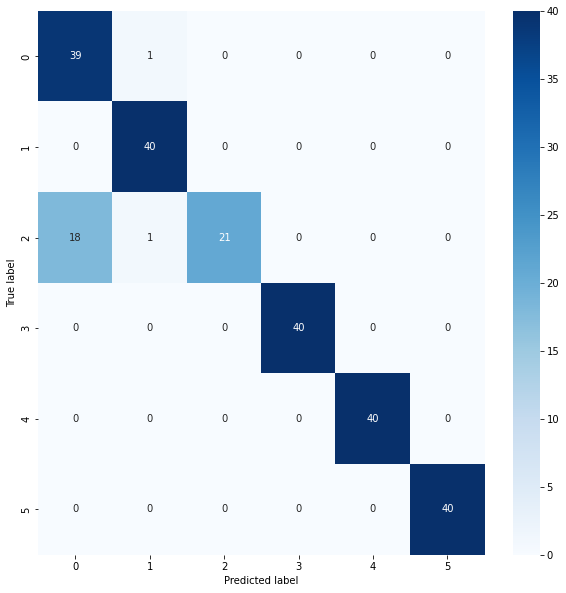

In [ ]:
model_history,model=train_model(DenseNet201,224,224)

##6.1.7 ResNet101V2

Found 1235 images belonging to 6 classes.
(32, 224, 224, 3) (32, 6)
Found 307 images belonging to 6 classes.
Image batch shape:  (32, 224, 224, 3)
Label batch shape:  (32, 6)
['Class1' 'Class2' 'Class3' 'Class4' 'Class5' 'Class6']
[[0. 0. 0. 1. 0. 0.]
 [0. 0. 1. 0. 0. 0.]
 [0. 0. 1. 0. 0. 0.]
 [1. 0. 0. 0. 0. 0.]
 [1. 0. 0. 0. 0. 0.]]
{'Class1': 0, 'Class2': 1, 'Class3': 2, 'Class4': 3, 'Class5': 4, 'Class6': 5}
171327488/171317808 [==============================] - 2s 0us/step
Epoch 1/30
39/39 [==============================] - ETA: 0s - loss: 1.4826 - tp: 529.0000 - fp: 235.0000 - tn: 7475.0000 - fn: 1013.0000 - precision: 0.6924 - recall: 0.3431 - acc: 0.4916 - auc: 0.8176 - cohen_kappa: 0.3898 - hamming_loss: 0.5084 - specificity_at_sensitivity: 0.8999 - sensitivity_at_specificity: 0.8923

/usr/local/lib/python3.7/dist-packages/keras/engine/training.py:1841: UserWarning: Metric CohenKappa implements a `reset_states()` method; rename it to `reset_state()` (without the final "s"). The name `reset_states()` has been deprecated to improve API consistency.
  m.reset_state()
/usr/local/lib/python3.7/dist-packages/keras/engine/functional.py:1410: CustomMaskWarning: Custom mask layers require a config and must override get_config. When loading, the custom mask layer must be passed to the custom_objects argument.
  layer_config = serialize_layer_fn(layer)


39/39 [==============================] - 69s 1s/step - loss: 1.4826 - tp: 529.0000 - fp: 235.0000 - tn: 7475.0000 - fn: 1013.0000 - precision: 0.6924 - recall: 0.3431 - acc: 0.4916 - auc: 0.8176 - cohen_kappa: 0.3898 - hamming_loss: 0.5084 - specificity_at_sensitivity: 0.8999 - sensitivity_at_specificity: 0.8923 - val_loss: 1.2047 - val_tp: 112.0000 - val_fp: 47.0000 - val_tn: 1488.0000 - val_fn: 195.0000 - val_precision: 0.7044 - val_recall: 0.3648 - val_acc: 0.4984 - val_auc: 0.8476 - val_cohen_kappa: 0.3983 - val_hamming_loss: 0.5016 - val_specificity_at_sensitivity: 0.9121 - val_sensitivity_at_specificity: 0.9446
Epoch 2/30
39/39 [==============================] - 55s 1s/step - loss: 0.9845 - tp: 572.0000 - fp: 178.0000 - tn: 5997.0000 - fn: 663.0000 - precision: 0.7627 - recall: 0.4632 - acc: 0.6097 - auc: 0.9003 - cohen_kappa: 0.5318 - hamming_loss: 0.3903 - specificity_at_sensitivity: 0.9631 - sensitivity_at_specificity: 0.9725 - val_loss: 0.9403 - val_tp: 150.0000 - val_fp: 43.

*FN,▁
*FP,▁
*TN,▁
*TP,▁
acc,▁▃▅▅▆▆▆▇▇▇▇▇▇█▇▇██▇███████████
accuracy_score,▁
auc,▁▄▆▆▇▇▇▇██████████████████████
cohen_kappa,▁▃▄▄▅▅▅▅▆▆▆▆▆▆▆▆▆▆▆▆▆▆▆▆▆▆▆▆▆▆█
epoch,▁▁▁▂▂▂▂▃▃▃▃▄▄▄▄▅▅▅▅▆▆▆▆▇▇▇▇███
f1_score,▁
fn,█▅▄▃▃▂▂▂▂▂▂▂▂▁▂▂▁▁▂▁▁▁▁▁▁▁▁▁▁▁


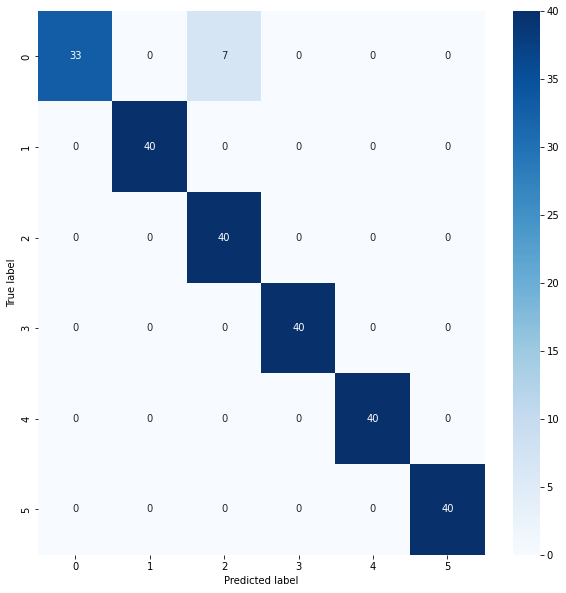

In [ ]:
model_history,model=train_model(ResNet101V2,224,224)

##6.1.8 ResNet152

In [ ]:
model_history,model=train_model(ResNet152,224,224)

<IPython.core.display.Javascript object>

wandb: Appending key for api.wandb.ai to your netrc file: /root/.netrc


Found 1235 images belonging to 6 classes.
(32, 224, 224, 3) (32, 6)
Found 307 images belonging to 6 classes.
Image batch shape:  (32, 224, 224, 3)
Label batch shape:  (32, 6)
['Class1' 'Class2' 'Class3' 'Class4' 'Class5' 'Class6']
[[0. 0. 0. 1. 0. 0.]
 [0. 0. 1. 0. 0. 0.]
 [0. 0. 1. 0. 0. 0.]
 [1. 0. 0. 0. 0. 0.]
 [1. 0. 0. 0. 0. 0.]]
{'Class1': 0, 'Class2': 1, 'Class3': 2, 'Class4': 3, 'Class5': 4, 'Class6': 5}
234708992/234698864 [==============================] - 2s 0us/step
Epoch 1/50
39/39 [==============================] - ETA: 0s - loss: 1.8813 - tp: 2.0000 - fp: 2.0000 - tn: 6173.0000 - fn: 1233.0000 - precision: 0.5000 - recall: 0.0016 - acc: 0.1628 - auc: 0.4945 - cohen_kappa: -0.0054 - hamming_loss: 0.8372 - MatthewsCorrelationCoefficient: 0.2886 - f1_score: 0.1597 - specificity_at_sensitivity: 0.4599 - sensitivity_at_specificity: 0.4632 

/usr/local/lib/python3.7/dist-packages/keras/engine/training.py:1841: UserWarning: Metric CohenKappa implements a `reset_states()` method; rename it to `reset_state()` (without the final "s"). The name `reset_states()` has been deprecated to improve API consistency.
  m.reset_state()
/usr/local/lib/python3.7/dist-packages/keras/engine/training.py:1841: UserWarning: Metric MatthewsCorrelationCoefficient implements a `reset_states()` method; rename it to `reset_state()` (without the final "s"). The name `reset_states()` has been deprecated to improve API consistency.
  m.reset_state()
/usr/local/lib/python3.7/dist-packages/keras/engine/training.py:1841: UserWarning: Metric F1Score implements a `reset_states()` method; rename it to `reset_state()` (without the final "s"). The name `reset_states()` has been deprecated to improve API consistency.
  m.reset_state()
/usr/local/lib/python3.7/dist-packages/keras/engine/functional.py:1410: CustomMaskWarning: Custom mask layers require a config a

39/39 [==============================] - 653s 16s/step - loss: 1.8813 - tp: 2.0000 - fp: 2.0000 - tn: 6173.0000 - fn: 1233.0000 - precision: 0.5000 - recall: 0.0016 - acc: 0.1628 - auc: 0.4945 - cohen_kappa: -0.0054 - hamming_loss: 0.8372 - MatthewsCorrelationCoefficient: 0.2886 - f1_score: 0.1597 - specificity_at_sensitivity: 0.4599 - sensitivity_at_specificity: 0.4632 - val_loss: 1.7676 - val_tp: 0.0000e+00 - val_fp: 0.0000e+00 - val_tn: 1535.0000 - val_fn: 307.0000 - val_precision: 0.0000e+00 - val_recall: 0.0000e+00 - val_acc: 0.1857 - val_auc: 0.5710 - val_cohen_kappa: 0.0193 - val_hamming_loss: 0.8143 - val_MatthewsCorrelationCoefficient: 0.2887 - val_f1_score: 0.0987 - val_specificity_at_sensitivity: 0.5655 - val_sensitivity_at_specificity: 0.6026
Epoch 2/50
39/39 [==============================] - 61s 2s/step - loss: 1.8336 - tp: 0.0000e+00 - fp: 1.0000 - tn: 6174.0000 - fn: 1235.0000 - precision: 0.0000e+00 - recall: 0.0000e+00 - acc: 0.1838 - auc: 0.5205 - cohen_kappa: 0.0200

##6.1.9 ResNet101

acc,▁▅▅▆▆▇▇▇▇▇▇▇████████
auc,▁▆▆▇▇▇██████████████
cohen_kappa,▁▅▅▆▆▇▇▇▇▇▇▇██▇█████
epoch,▁▁▂▂▂▃▃▄▄▄▅▅▅▆▆▇▇▇██
fn,█▅▄▃▃▂▂▂▂▂▂▂▁▁▁▁▁▁▁▁
fp,▄▁▃▆▅▅▄▆██▇▇▆▇█▇▇██▇
hamming_loss,█▄▄▃▃▂▂▂▂▂▂▂▁▁▁▁▁▁▁▁
loss,█▅▄▄▃▃▂▂▂▂▂▂▁▁▂▁▁▁▁▁
precision,▁█▆▅▆▆▇▆▅▆▆▆▇▆▆▆▆▆▆▆
recall,▁▂▄▅▅▆▆▇▇▇▇▇▇▇▇█████
sensitivity_at_specificity_3,▁▇██████████████████


Found 1235 images belonging to 6 classes.
(32, 224, 224, 3) (32, 6)
Found 307 images belonging to 6 classes.
Image batch shape:  (32, 224, 224, 3)
Label batch shape:  (32, 6)
['Class1' 'Class2' 'Class3' 'Class4' 'Class5' 'Class6']
[[0. 0. 1. 0. 0. 0.]
 [0. 0. 1. 0. 0. 0.]
 [0. 0. 1. 0. 0. 0.]
 [0. 1. 0. 0. 0. 0.]
 [0. 0. 0. 1. 0. 0.]]
{'Class1': 0, 'Class2': 1, 'Class3': 2, 'Class4': 3, 'Class5': 4, 'Class6': 5}
171458560/171446536 [==============================] - 2s 0us/step
Epoch 1/30
39/39 [==============================] - ETA: 0s - loss: 1.8606 - tp: 228.0000 - fp: 28.0000 - tn: 7682.0000 - fn: 1314.0000 - precision: 0.8906 - recall: 0.1479 - acc: 0.3035 - auc: 0.6576 - cohen_kappa: 0.1642 - hamming_loss: 0.6965 - MatthewsCorrelationCoefficient: 0.2886 - f1_score: 0.3047 - specificity_at_sensitivity_3: 0.6682 - sensitivity_at_specificity_3: 0.6680

/usr/local/lib/python3.7/dist-packages/keras/engine/training.py:1841: UserWarning: Metric CohenKappa implements a `reset_states()` method; rename it to `reset_state()` (without the final "s"). The name `reset_states()` has been deprecated to improve API consistency.
  m.reset_state()
/usr/local/lib/python3.7/dist-packages/keras/engine/training.py:1841: UserWarning: Metric MatthewsCorrelationCoefficient implements a `reset_states()` method; rename it to `reset_state()` (without the final "s"). The name `reset_states()` has been deprecated to improve API consistency.
  m.reset_state()
/usr/local/lib/python3.7/dist-packages/keras/engine/training.py:1841: UserWarning: Metric F1Score implements a `reset_states()` method; rename it to `reset_state()` (without the final "s"). The name `reset_states()` has been deprecated to improve API consistency.
  m.reset_state()
/usr/local/lib/python3.7/dist-packages/keras/engine/functional.py:1410: CustomMaskWarning: Custom mask layers require a config a

39/39 [==============================] - 69s 1s/step - loss: 1.8606 - tp: 228.0000 - fp: 28.0000 - tn: 7682.0000 - fn: 1314.0000 - precision: 0.8906 - recall: 0.1479 - acc: 0.3035 - auc: 0.6576 - cohen_kappa: 0.1642 - hamming_loss: 0.6965 - MatthewsCorrelationCoefficient: 0.2886 - f1_score: 0.3047 - specificity_at_sensitivity_3: 0.6682 - sensitivity_at_specificity_3: 0.6680 - val_loss: 1.7619 - val_tp: 0.0000e+00 - val_fp: 0.0000e+00 - val_tn: 1535.0000 - val_fn: 307.0000 - val_precision: 0.0000e+00 - val_recall: 0.0000e+00 - val_acc: 0.1857 - val_auc: 0.5654 - val_cohen_kappa: 0.0223 - val_hamming_loss: 0.8143 - val_MatthewsCorrelationCoefficient: 0.2887 - val_f1_score: 0.0939 - val_specificity_at_sensitivity_3: 0.5609 - val_sensitivity_at_specificity_3: 0.5928
Epoch 2/30
39/39 [==============================] - 51s 1s/step - loss: 1.8221 - tp: 1.0000 - fp: 0.0000e+00 - tn: 6175.0000 - fn: 1234.0000 - precision: 1.0000 - recall: 8.0972e-04 - acc: 0.1781 - auc: 0.5294 - cohen_kappa: 0.

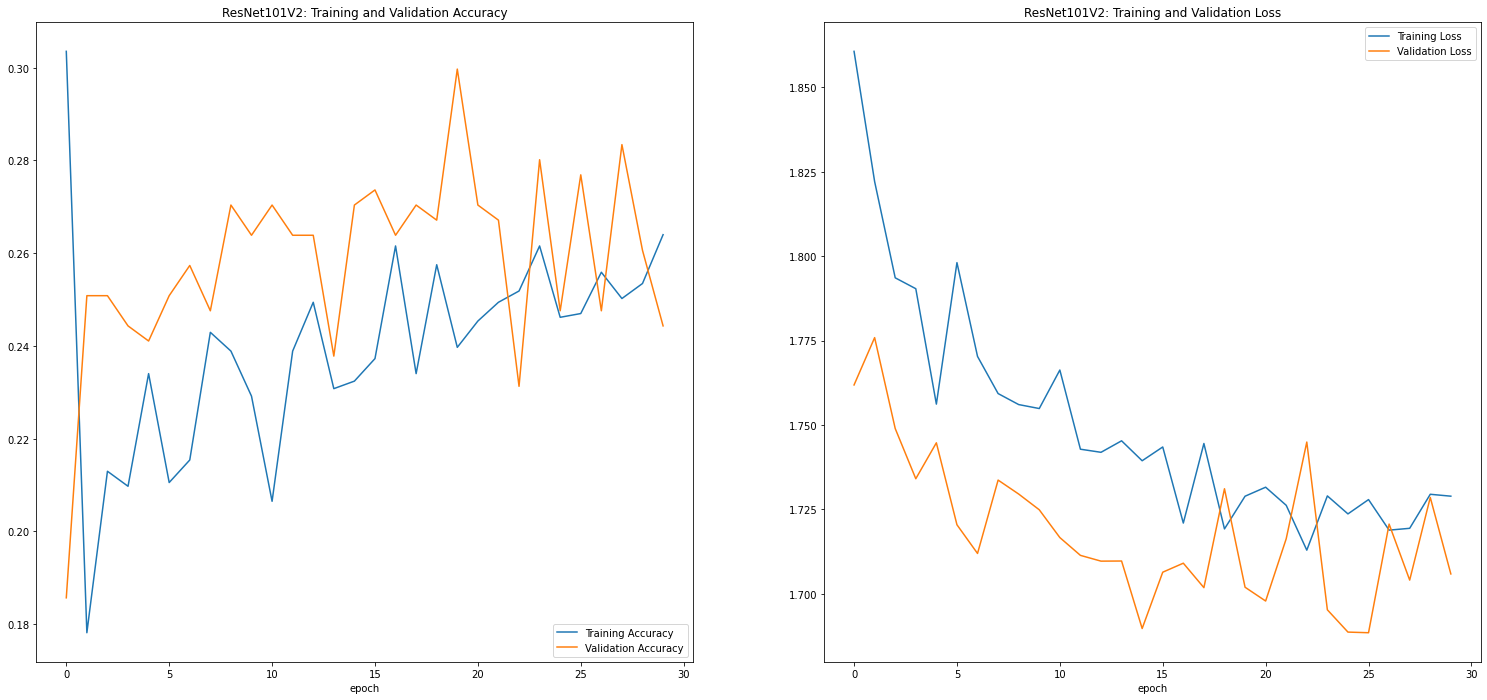

Confusion Matrix
[[ 0 40  0  0  0  0]
 [ 0 40  0  0  0  0]
 [ 0 40  0  0  0  0]
 [ 0 40  0  0  0  0]
 [ 0 40  0  0  0  0]
 [ 0 40  0  0  0  0]]
Classification Report
              precision    recall  f1-score   support

      Class1       0.00      0.00      0.00        40
      Class2       0.17      1.00      0.29        40
      Class3       0.00      0.00      0.00        40
      Class4       0.00      0.00      0.00        40
      Class5       0.00      0.00      0.00        40
      Class6       0.00      0.00      0.00        40

    accuracy                           0.17       240
   macro avg       0.03      0.17      0.05       240
weighted avg       0.03      0.17      0.05       240



/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1308: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1308: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1308: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/keras/engine/functional.py:1

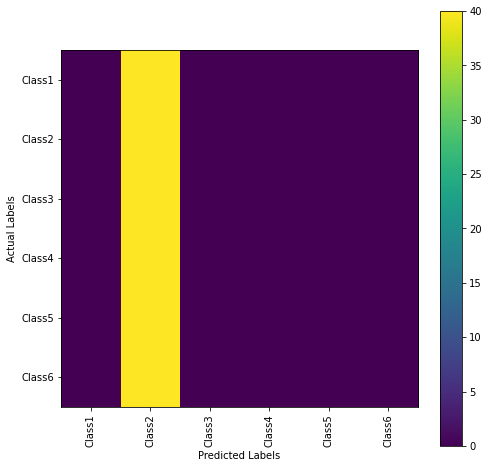

<Figure size 576x576 with 0 Axes>

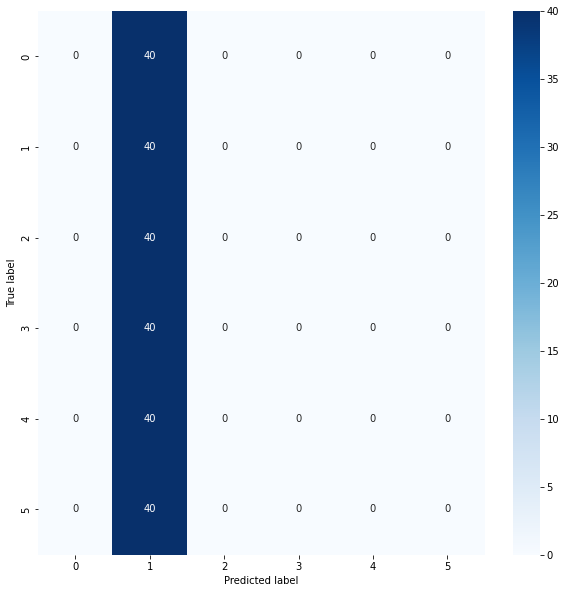

In [ ]:
model_history,model=train_model(ResNet101,224,224)

##6.1.10 DenseNet169

In [ ]:
model_history,model=train_model(DenseNet169,224,224)


# Inference

In [ ]:
img = keras.preprocessing.image.load_img(
    "sample_data/.jpg", target_size=image_size
)
img_array = keras.preprocessing.image.img_to_array(img)
img_array = tf.expand_dims(img_array, 0)  # Create batch axis

predictions = model.predict(img_array)
score = predictions[0]
print(
    "This image is %.2f percent  "
    % (100 * (1 - score), 100 * score)
)

NameError: ignored

In [ ]:
from tensorflow_addons.metrics.hamming import HammingLoss
import tensorflow as tf
load_path='Baseplates_Xception2022-01-16 10:56:16.903854.h5'
from tensorflow.python.saved_model import load as tf_load
from tensorflow.python.keras.saving.saved_model.load import KerasObjectLoader
from tensorflow.python.keras.saving import saving_utils

custom_objects = {"Hamming_loss": HammingLoss}
# Load the model and compile on its own (working)
loaded_model = tf.keras.models.load_model(load_path, custom_objects=custom_objects, compile=False)
loaded_model.compile(optimizer='Adam', loss=HammingLoss)
# Load the model while also loading optimizer and compiling (failing with "Unkown loss function: my_custom_loss")
#loaded_model = tf.keras.models.load_model(load_path, custom_objects=custom_objects,compile=True) # compile is set to True by default
#model = tf.keras.models.load_model('Baseplates_Xception2022-01-16 10:56:16.903854.h5')

In [ ]:
xception=loaded_model

Found 240 images belonging to 6 classes.
[40 37 40 40 40 40]
237
[0, 0, 3, 0, 0, 0]
3
[200, 200, 197, 200, 200, 200]
1197
[0, 3, 0, 0, 0, 0]
3
0.9875
0.9874823971209513
0.9883720930232558
0.9874999999999999
0.0125
0.012499999999999956
0.985


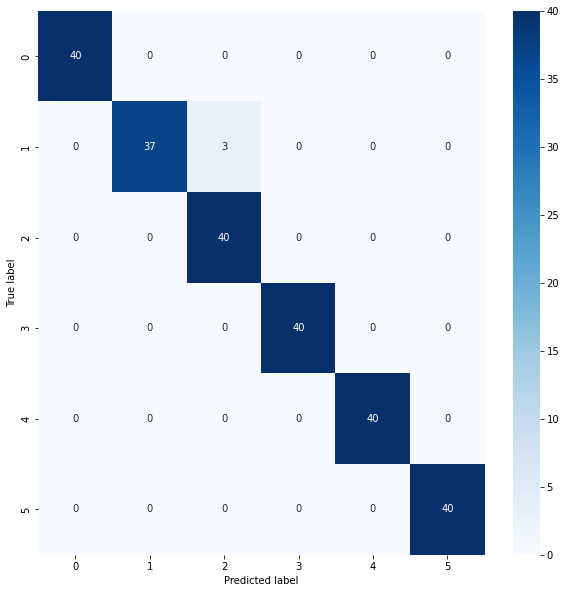

In [ ]:
Images4ValidationGenerator=testGen(299,299)
class_labels = Images4ValidationGenerator.class_indices
class_labels = {v: k for k, v in class_labels.items()}
classes = list(class_labels.values())
y_true = Images4ValidationGenerator.classes
Y_pred = loaded_model.predict(Images4ValidationGenerator)

y_pred = np.argmax(Y_pred, axis=1)

conf_mat = confusion_matrix(Images4ValidationGenerator.classes, y_pred)
conf_mat_normalized = conf_mat.astype('float') / conf_mat.sum(axis=1)[:, np.newaxis]
plt.figure(figsize = (10,10))
sns.heatmap(conf_mat, annot=True,fmt='d',cmap="Blues")
plt.ylabel('True label')
plt.xlabel('Predicted label')

acc = accuracy_score(y_true, y_pred)
f1 = f1_score(y_true, y_pred, average='macro')  
prec = precision_score(y_true, y_pred, average='macro')
rec = recall_score(y_true, y_pred, average='macro')
ham = hamming_loss(y_true, y_pred)
zero = zero_one_loss(y_true, y_pred)
cohen = cohen_kappa_score(y_true, y_pred)
TruePositive = np.diag(conf_mat)
FalsePositive = []
FalseNegative = []
TrueNegative = []

for i in range(6):
    FalsePositive.append(sum(conf_mat[:,i]) - conf_mat[i,i])  
    FalseNegative.append(sum(conf_mat[i,:]) - conf_mat[i,i])
    temp = np.delete(conf_mat, i, 0)   # delete ith row
    temp = np.delete(temp, i, 1)  # delete ith column
    TrueNegative.append(sum(sum(temp)))

TP = sum(TruePositive)
FP = sum(FalsePositive)
FN = sum(FalseNegative)
TN = sum(TrueNegative)

print(TruePositive)
print(TP)
print(FalsePositive)
print(FP)
print(TrueNegative)
print(TN)
print(FalseNegative)
print(FN)
print(acc)
print(f1)
print(prec)
print(rec)
print(ham)
print(zero)
print(cohen)

In [ ]:
y_score=loaded_model.predict(Images4ValidationGenerator)

In [ ]:
print(y_score)


[[7.6430243e-01 8.7095365e-02 1.2762874e-01 4.6127872e-03 1.6149202e-02
  2.1152770e-04]
 [8.8652515e-01 2.2070587e-02 7.6151930e-02 1.9120867e-03 1.3274184e-02
  6.5921551e-05]
 [7.6520962e-01 2.1486390e-02 1.8680103e-01 3.0986508e-03 2.3321521e-02
  8.2833067e-05]
 ...
 [1.9755865e-04 2.7458230e-03 3.3259380e-03 5.8435806e-04 5.8178679e-04
  9.9256450e-01]
 [4.6746549e-04 6.9107055e-03 5.4006809e-03 7.8051072e-04 5.4400315e-04
  9.8589665e-01]
 [1.2355150e-03 1.9626170e-02 9.0692826e-03 2.3226344e-03 6.8311050e-04
  9.6706319e-01]]
(240, 6)


In [ ]:
roc_auc_score(y_true, y_score,multi_class='ovo')

0.9999791666666666

In [ ]:
from sklearn.metrics import roc_curve, roc_auc_score
yproba = xception.predict(Images4ValidationGenerator)

In [ ]:
x_test, y_test = next(Images4ValidationGenerator)
print(yproba.shape, y_test.shape)

(240, 6) (32, 6)


In [ ]:
xtrain,ytrain=next(train_generator)

ValueError: ignored

In [ ]:
 pip install yellowbrick

In [ ]:
from yellowbrick.classifier import ROCAUC

def plot_ROC_curve(model, xtrain, ytrain, xtest, ytest):

    # Creating visualization with the readable labels
    visualizer = ROCAUC(model, encoder={0: 'functional', 
                                        1: 'needs repair', 
                                        2: 'nonfunctional'})
                                        
    # Fitting to the training data first then scoring with the test data                                    
    visualizer.fit(xtrain, ytrain)
    visualizer.score(xtest, ytest)
    visualizer.show()
    
    return visualizer


In [ ]:
plot_ROC_curve(xception,xtrain,ytrain,x_test,y_test)

visualizer = ROCAUC(xception, classes=["Class1", "Class2", "Class3","Class4","Class5"])

visualizer.fit(xtrain, ytrain)        # Fit the training data to the visualizer
visualizer.score(x_test, y_test)        # Evaluate the model on the test data
visualizer.show()            

YellowbrickTypeError: ignored

In [ ]:
loaded_model.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 xception (Functional)       (None, 10, 10, 2048)      20861480  
                                                                 
 global_average_pooling2d_2   (None, 2048)             0         
 (GlobalAveragePooling2D)                                        
                                                                 
 dropout_2 (Dropout)         (None, 2048)              0         
                                                                 
 dense_2 (Dense)             (None, 6)                 12294     
                                                                 
Total params: 20,873,774
Trainable params: 12,294
Non-trainable params: 20,861,480
_________________________________________________________________


In [ ]:
# Evaluate the restored model
loss, acc = loaded_model.evaluate(test_images, test_labels, verbose=2)
print('Restored model, accuracy: {:5.2f}%'.format(100 * acc))

print(new_model.predict(test_images).shape)

NameError: ignored